In [1]:
#first option - !pip install imblearn
#second option - from imblearn.over_sampling import RandomOverSampler

In [2]:
#to go online we use google collab

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [4]:
#to load dataset salary1.csv
df=pd.read_csv('salary1.csv')
df.head()

Unnamed: 0  age          Workclass  fnlwgt   education  education-num  \
0           0   39          State-gov   77516   Bachelors             13   
1           1   50   Self-emp-not-inc   83311   Bachelors             13   
2           2   38            Private  215646     HS-grad              9   
3           3   53            Private  234721        11th              7   
4           4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  Income  
0          2174             0              40   United-States       0  
1             0             0              13   United-States       0  
2             0             0              40   United-States       0  
3             0             0              40   United-States       0  
4             0             0              40            Cuba       0

In [5]:
#to delete useless col
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head(2)

age          Workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   

        marital-status        occupation    relationship    race    sex  \
0        Never-married      Adm-clerical   Not-in-family   White   Male   
1   Married-civ-spouse   Exec-managerial         Husband   White   Male   

   capital-gain  capital-loss  hours-per-week  native-country  Income  
0          2174             0              40   United-States       0  
1             0             0              13   United-States       0

In [7]:
#to check null values
df.isnull().sum()

age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

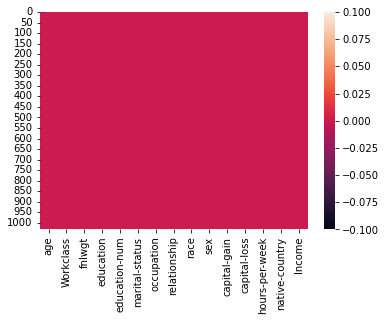

In [8]:
#to see visually
sb.heatmap(df.isnull())
plt.show()

In [9]:
#to see datatypes
df.dtypes

age                int64
Workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income             int64
dtype: object

In [10]:
#to see duplicate values
df.duplicated().sum()

0

In [11]:
#to see no of rows and cols
df.shape

(1032, 15)

In [12]:
#to see mean,median
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  1032.000000  1.032000e+03    1032.000000    1032.00000   1032.000000   
mean     37.954457  1.918318e+05      10.221899     560.19186    102.870155   
std      12.825353  1.074243e+05       2.501636    2406.47961    432.251488   
min      17.000000  2.117400e+04       1.000000       0.00000      0.000000   
25%      28.000000  1.155792e+05       9.000000       0.00000      0.000000   
50%      37.000000  1.807065e+05      10.000000       0.00000      0.000000   
75%      46.000000  2.461932e+05      13.000000       0.00000      0.000000   
max      90.000000  1.033222e+06      16.000000   25236.00000   2415.000000   

       hours-per-week       Income  
count     1032.000000  1032.000000  
mean        40.706395     0.246124  
std         11.736603     0.430961  
min          1.000000     0.000000  
25%         40.000000     0.000000  
50%         40.000000     0.000000  
75%         45.000000     0.000000  
max         99.000000     1.000000

In [13]:
#here Income is output which is categorical/discrete 
#to see how many categories in Income col
df['Income'].unique()

array([0, 1], dtype=int64)

In [14]:
#to see how many categories in Income col
df['Income'].value_counts()

0    778
1    254
Name: Income, dtype: int64

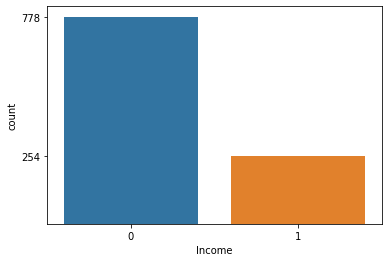

In [15]:
#to visualize
sb.countplot(data=df,x='Income')
f=df['Income'].value_counts()
plt.yticks(f)
plt.show()

In [16]:
#we can see diff between 0 and 1 is more then half , it means output is unbalanced 

In [17]:
#split object and int , then apply LabelEncoder on object to convert it into int
#then merge them 
#apply train_test_split
#apply scaling 
#give data for LogisticRegression algo
#check the classification_score

In [18]:
#to split the data into object type and int type
df_cat=df.select_dtypes(object)
df_cat.dtypes

Workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
dtype: object

In [19]:
df_num=df.select_dtypes('int64')
df_num.dtypes

age               int64
fnlwgt            int64
education-num     int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
Income            int64
dtype: object

In [20]:
#call label encoder
from sklearn.preprocessing import LabelEncoder
#convert all object type to numeric type using 
for col in df_cat:
    #create a object for LabelEncoder class
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [21]:
df_cat.head()
#we can see its converted

Workclass  education  marital-status  occupation  relationship  race  sex  \
0          5          9               4           0             1     4    1   
1          4          9               2           3             0     4    1   
2          2         11               0           5             1     4    1   
3          2          1               2           5             0     2    1   
4          2          9               2           9             5     2    0   

   native-country  
0              28  
1              28  
2              28  
3              28  
4               4

In [22]:
#see the dtypes
df_cat.dtypes

Workclass         int32
education         int32
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
native-country    int32
dtype: object

In [23]:
#now we will merge both the df(df_cat and df_num) now and hold it into new df
df_new=pd.concat([df_cat,df_num],axis=1)
df_new.head()

Workclass  education  marital-status  occupation  relationship  race  sex  \
0          5          9               4           0             1     4    1   
1          4          9               2           3             0     4    1   
2          2         11               0           5             1     4    1   
3          2          1               2           5             0     2    1   
4          2          9               2           9             5     2    0   

   native-country  age  fnlwgt  education-num  capital-gain  capital-loss  \
0              28   39   77516             13          2174             0   
1              28   50   83311             13             0             0   
2              28   38  215646              9             0             0   
3              28   53  234721              7             0             0   
4               4   28  338409             13             0             0   

   hours-per-week  Income  
0              40       0  
1              13       0  
2              40       0  
3              40       0  
4              40       0

In [24]:
#to select input and output
X=df_new.drop('Income',axis=1) #dropping so rest others stay as input 
Y=df_new['Income'] #output

In [25]:
X.head()

Workclass  education  marital-status  occupation  relationship  race  sex  \
0          5          9               4           0             1     4    1   
1          4          9               2           3             0     4    1   
2          2         11               0           5             1     4    1   
3          2          1               2           5             0     2    1   
4          2          9               2           9             5     2    0   

   native-country  age  fnlwgt  education-num  capital-gain  capital-loss  \
0              28   39   77516             13          2174             0   
1              28   50   83311             13             0             0   
2              28   38  215646              9             0             0   
3              28   53  234721              7             0             0   
4               4   28  338409             13             0             0   

   hours-per-week  
0              40  
1              13  
2              40  
3              40  
4              40

In [26]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [27]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((722, 14), (310, 14), (722,), (310,))

In [28]:
X_train.head()

Workclass  education  marital-status  occupation  relationship  race  \
286          2          7               2           0             0     4   
600          2         11               4           3             2     4   
691          2          9               4           9             4     4   
474          2         11               0           2             1     4   
639          5          9               4          12             1     4   

     sex  native-country  age  fnlwgt  education-num  capital-gain  \
286    1              28   35  193815             12             0   
600    1              28   24  556660              9          4101   
691    1              28   22  223515             13             0   
474    1              28   28  189346              9             0   
639    0              28   23  335453             13             0   

     capital-loss  hours-per-week  
286             0              40  
600             0              50  
691             0              20  
474             0              45  
639             0              20

In [30]:
#to apply StandardScaler 
from sklearn.preprocessing import StandardScaler
#to create an object of StandardScaler
ss=StandardScaler()
#to apply 
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [32]:
X_train

array([[-0.24904966, -0.93217405, -0.37685422, ..., -0.24796148,
        -0.2300775 , -0.10196177],
       [-0.24904966,  0.17523798,  0.95691415, ...,  1.38249871,
        -0.2300775 ,  0.77130512],
       [-0.24904966, -0.37846803,  0.95691415, ..., -0.24796148,
        -0.2300775 , -1.84849555],
       ...,
       [-1.2824626 , -0.65532104, -1.71062259, ..., -0.24796148,
        -0.2300775 ,  1.29526525],
       [ 1.81777623,  0.17523798,  0.95691415, ..., -0.24796148,
        -0.2300775 ,  0.07269161],
       [ 1.81777623,  0.17523798, -0.37685422, ..., -0.24796148,
        -0.2300775 , -0.10196177]])

In [34]:
#to apply LogisticRegression 
from sklearn.linear_model import LogisticRegression

In [36]:
#to create an object
lr=LogisticRegression()

In [38]:
#to train use fit()
lr.fit(X_train,Y_train)

LogisticRegression()

In [40]:
#to test use predict
Y_pred=lr.predict(X_test)
Y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,

In [42]:
#to compare Y_pred and Y_test
dict={'Actual Output':Y_test,'Predicted output':Y_pred}
df1=pd.DataFrame(dict)
df1.head(10)

Actual Output  Predicted output
339              0                 0
244              0                 0
862              1                 1
567              0                 0
926              0                 0
358              0                 0
576              1                 0
27               0                 0
997              0                 0
563              0                 0

In [44]:
#to check the accuracy score (0 - 1) we use score()
lr.score(X_test,Y_test)

0.8258064516129032

In [46]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))

[[227  11]
 [ 43  29]]


In [47]:
#classification_report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       238
           1       0.72      0.40      0.52        72

    accuracy                           0.83       310
   macro avg       0.78      0.68      0.71       310
weighted avg       0.81      0.83      0.81       310

